In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv(r"data\housing.csv",header=0)

In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


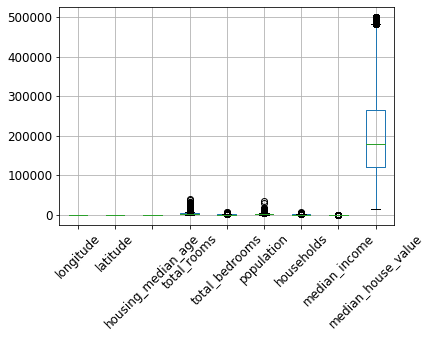

In [32]:
df.boxplot(grid=True,fontsize="large",rot=45)

In [36]:
X=df.iloc[ : ,7:9]

In [37]:

def check_missing_value(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
    return missing_data


In [38]:
miss=check_missing_value(df)
miss

,total,percent
total_bedrooms,207,1.002907
ocean_proximity,0,0.000000
median_house_value,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000
total_rooms,0,0.000000
housing_median_age,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [39]:
%%time
#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX=15
wsse=[]
#progress bar
with tqdm(total=K_MAX-1) as pbar:
    for i in range (1,K_MAX):
        Kmeans=KMeans(n_clusters=i,random_state=10,n_jobs=-1)
        Kmeans.fit(X)
        wsse.append(Kmeans.inertia_)
        pbar.update(1)


Wall time: 9.84 s


In [51]:
Kmeans.n_iter_

12

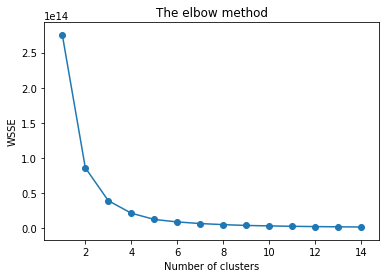

In [40]:
plt.plot(range(1,K_MAX),wsse)
plt.scatter(range(1,K_MAX),wsse) 
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [41]:
Kmeans= KMeans(n_clusters=5,random_state=10)
Y_pred=Kmeans.fit_predict(X)

In [42]:
Y_pred

array([4, 1, 1, ..., 3, 3, 3])

In [47]:
df["clusters"]=Y_pred
df.head(40)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,clusters
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,2
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,2
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,2


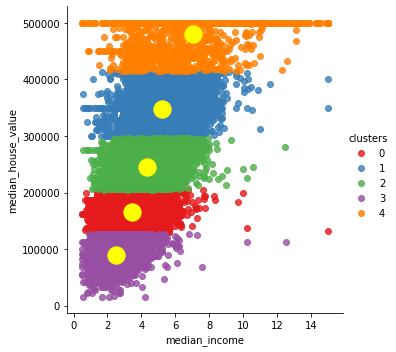

In [49]:
sns.lmplot(data=df,
          x='median_income',
          y='median_house_value',
          fit_reg = False, #No regression Line
          hue = 'clusters',
          palette = "Set1")

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1],
           s = 300, c = 'yellow')
plt.show()